In [1]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import urllib.request
import os
from google_patent_scraper import scraper_class
import json
import timeit
import networkx as nx
import matplotlib.pyplot as plt

In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Loading patents

In [2]:
ids = pd.read_csv(r"../data/gp-q2-7topics.csv",index_col='code',skipinitialspace=True)
print(ids.isnull().sum())
ids 

Unnamed: 0            0
title                 0
pub_date              0
citations             0
abstract              0
class                 0
year                  0
abstract_processed    0
topic                 0
dtype: int64


,Unnamed: 0,title,pub_date,citations,abstract,class,year,abstract_processed,topic
code,,,,,,,,,
US8370262B2,0,System and method for performing secure online...,2013-02-05,"['US10681025B2', 'CN106664208B', 'AU2012261635...",\nThe system and method performing secure onli...,G06,2013,\nthe system and method performing secure onli...,4
US10237070B2,1,System and method for sharing keys across auth...,2019-03-19,"['US10268809B2', 'JP6538821B2', 'KR101721032B1...","\nA system, apparatus, method, and machine rea...",H04,2019,\na system apparatus method and machine readab...,4
US10637853B2,2,Authentication techniques including speech and...,2020-04-28,"['US10706421B2', 'US20160269411A1', 'US1021258...","\nA system, apparatus, method, and machine rea...",H04,2020,\na system apparatus method and machine readab...,4
US10558974B2,3,Methods and systems of providing verification ...,2020-02-11,"['US20190149537A1', 'US20180308098A1', 'US2018...",\nA method and system of providing verificatio...,G06,2020,\na method and system of providing verificatio...,4
US10769635B2,4,Authentication techniques including speech and...,2020-09-08,"['US9531710B2', 'US10706421B2', 'US20160269411...","\nA system, apparatus, method, and machine rea...",G06,2020,\na system apparatus method and machine readab...,1
...,...,...,...,...,...,...,...,...,...
KR100477956B1,9471,System and method for filtering message edited...,2005-03-23,"['US9501746B2', 'US10110519B2', 'US7133898B1',...",\r\nA method and system for filtering a messag...,H04,2005,\r\na method and system for filtering a messag...,6
FR3092468A1,9472,Secure registration and building control system,2020-08-07,"['US20150173255A1', 'US10147307B2', 'US9135807...",\r\n \r\n \r\n [Systme denregis...,H04,2020,\r\n \r\n \r\n [systme denregis...,0
CN105723378B,9473,Protection system including safety regulation ...,2019-06-18,"['JP2017034696A', 'CN107852410B', 'CN105210042...",\nThis disclosure relates to a kind of protect...,H04,2019,\nthis disclosure relates to a kind of protect...,3


In [3]:
ids['class'].value_counts()

G06    4726
H04    3304
NAN     621
G08     153
G07     125
G01      90
G05      70
G10      58
G16      43
G09      41
B60      35
A61      33
A63      30
G11      21
B64      20
B25       9
B65       8
Y02       8
F41       7
B42       6
H01       6
A01       5
H05       5
A47       5
B61       4
H02       4
B07       3
A62       3
A41       2
F24       2
C12       2
B67       2
C07       2
E05       2
G02       1
A45       1
F02       1
G21       1
H03       1
A23       1
B63       1
C02       1
F16       1
B01       1
F21       1
B29       1
E01       1
Y04       1
B62       1
C11       1
B22       1
B66       1
E04       1
F03       1
C09       1
Name: class, dtype: int64

ids = ids[ids.abstract.notna()]
#ids = ids[ids['class'].notna()]
ids = ids[ids['citations']!='[]']
ids['class'] = ids['class'].astype('str').apply(lambda x: x[:4] if len(x) >= 3 else 'NAN')
print(ids.isnull().sum())


In [4]:
ids['class'] = [cl if cl=='G06' or cl=='H04' else 'other' for cl in ids['class']  ]
ids['class'].value_counts()

G06      4726
H04      3304
other    1446
Name: class, dtype: int64

In [5]:
ids['class_topic'] = [ cl + '_' + str(topic) for (cl,topic) in ids[['class','topic']].values]
pd.crosstab(ids['class'],ids['topic'])

topic,0,1,2,3,4,5,6
class,,,,,,,
G06,696,480,391,770,897,958,534
H04,406,249,252,293,689,1107,308
other,119,99,146,700,88,227,67


## Building the network

In [6]:
G = nx.Graph()

for code, patent in ids.iterrows():
    patent['class_topic'] = patent['class'] + '_' + str(patent['topic'])
    if patent['citations'] != '[]': #citation is a string represetnation of a list 
        for l in str(patent['citations'][1:-1]).split(','):
            link = l.replace(" ","")[1:-1]
            if link in ids.index and link!=code: 
                G.add_edge(code, str(link) )

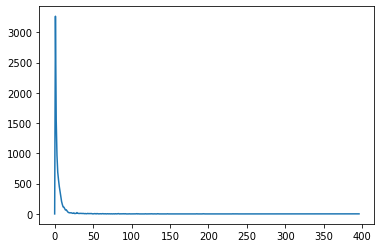

density:  0.0006411086026523331
average clustering coefficient:  0.10546879732181237


In [7]:
plt.plot(nx.degree_histogram(G))
plt.show()
print('density: ', nx.density(G))
print('average clustering coefficient: ', nx.average_clustering(G))

In [8]:
ids['class']=ids['class'].astype('str')

nx.set_node_attributes(G, 'NA', name='class')
for node in ids.index:
    nx.set_node_attributes(G, {node: str(ids.loc[node,'class'])}, name='class')
    nx.set_node_attributes(G, {node: str(ids.loc[node,'topic'])}, name='topic')
    nx.set_node_attributes(G, {node: str(ids.loc[node,'class_topic'])}, name='class_topic')
                           
print('number of nodes: ', len(G.nodes))
pd.Series( [G.nodes[node]['class_topic'] for node in G.nodes]).value_counts()

number of nodes:  9476


H04_5      1107
G06_5       958
G06_4       897
G06_3       770
other_3     700
G06_0       696
H04_4       689
G06_6       534
G06_1       480
H04_0       406
G06_2       391
H04_6       308
H04_3       293
H04_2       252
H04_1       249
other_5     227
other_2     146
other_0     119
other_1      99
other_4      88
other_6      67
dtype: int64

In [9]:
nx.write_graphml(G, "../data/7topics.graphml")

# Components

In [22]:
G = nx.read_graphml("../data/7topics.graphml") #when reading you should change the attibute names
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components])
print('average componets size: ', avg_size)
print([len(c) for c in components[:7]])

average componets size:  24.359897172236504
[8104, 120, 68, 45, 22, 18, 17]


In [27]:
Large = components[0]
L = G.subgraph(Large)
nx.write_graphml(L, "../data/LargeComp7topics.graphml")

mediums = [c for c in components[1:] if len(c) >= avg_size]
ms = G.subgraph([node  for c in mediums for node in c])
nx.write_graphml(ms, "../data/mediumComps7topics.graphml")

smalls = [c for c in components[1:] if len(c) < avg_size]
ss = G.subgraph([node  for c in smalls for node in c])
nx.write_graphml(ss, "../data/smallmComps7topics.graphml")

print(len(Large),nx.average_clustering(G,Large))
for c in mediums: print(len(c),nx.average_clustering(G,c))

8104 0.11368707831513404
120 0.5639412318862846
68 0.020647653000594176
45 0.0


In [28]:
for c in mediums:
    print('\n\n')
    for node in c:
        print(ids.loc[node,'title'])




Revenue models associated with syndication of a behavioral profile using a monetization platform 
Mobile campaign creation 
System for targeting advertising content to a plurality of mobile communication facilities 
Managing sponsored content based on device characteristics 
Mobile search result clustering 
Revenue models associated with syndication of a behavioral profile using a monetization platform 
Mobile dynamic advertisement creation and placement 
Targeting mobile sponsored content within a social network 
Presentation of search results to mobile devices based on television viewing history 
System for targeting advertising content to a plurality of mobile communication facilities 
Embedding sponsored content in mobile applications 
Search results of mobile content by combination of algorithmic review and editorial review 
Exclusivity bidding for mobile sponsored content 
On-off handset search box 
System for targeting advertising content to a plurality of mobile communicatio

The creating of anew content by the extracting multimedia core 
Secondary content insertion apparatus and methods 
Multimedia data processing method and device, computer equipment and storage medium 
Personal media channel apparatus and methods 
Named entity disambiguation for providing TV content enrichment 
Smart mechanism for blocking media responsive to user environment 
Recording and playback system based on multimedia content fingerprints 
Multifunction multimedia device 
Agnostic media delivery system 
Method, apparatus, computer device and storage medium for processing short video data 
Systems and methods for providing context-specific media assets 
Information processing device and information processing system 



Decoding steganographic messages embedded in media signals 
Background watermark processing 
Counteracting geometric distortions in watermarking 
Steganographic decoding with transform to spatial domain 
Audio processing 
Linking of computers based on optical sensi

We analyse titles of medium size components to find something intersting.
But we eill focus on the unique large component found.
# Large component

In [29]:
L = nx.read_graphml( "../data/LargeComp7topics.graphml")
print(len(G))
print(len(L))

9476
8104


# CORES

In [33]:
G = L.copy()
cores = nx.core_number(G)
print(pd.Series(cores).value_counts())
for node in G.nodes:
     nx.set_node_attributes(G, {node: cores[node]}, name='core')
nx.write_graphml(G, "../data/L_cores.graphml")

1     2589
2     1587
3      918
4      708
5      573
6      480
8      407
7      321
9      138
11      89
10      77
13      63
12      53
14      51
15      50
dtype: int64


In [38]:
ids['core'] = [0 for patent in ids.index]
for patent in cores.keys():
    ids.loc[patent,'core'] = cores[node]
    

## Community detection 